In [1]:
# Read the data 
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np

# Training the model 
from sklearn.cluster import KMeans

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Visualize the data 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocessing

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris_df = pd.DataFrame(X,columns=iris.feature_names)
iris_df['Target'] = y
iris_df.head()
cluster_df = iris_df[['petal length (cm)','petal width (cm)','Target']] #intention = plotting

In [4]:
X_cluster = iris_df[['petal length (cm)','petal width (cm)']] #intention = model building 

In [5]:
# Standardizing the data 
X_cluster = StandardScaler().fit_transform(X_cluster)

# Initialize the cluster model

In [6]:
# Model declaration with hyperparameters 
model = KMeans(n_clusters=3, random_state=1)
# Model training/fitting 
model.fit(X_cluster)

KMeans(n_clusters=3, random_state=1)

# Before Clustering

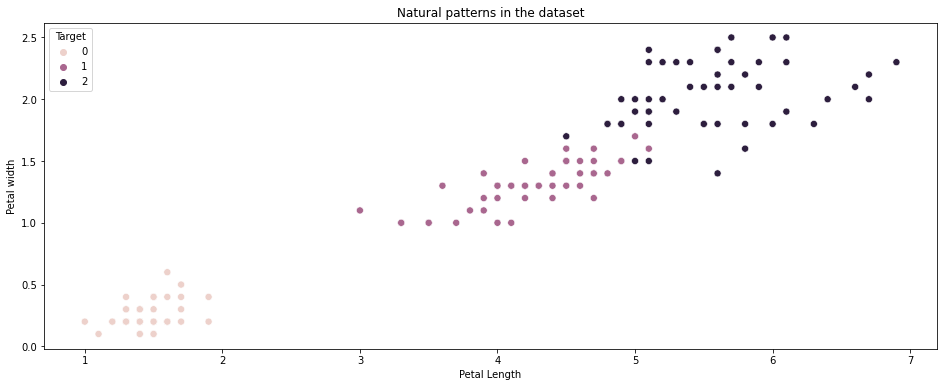

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',s=50, hue='Target',data=cluster_df,ax=ax)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal width')
ax.set_title('Natural patterns in the dataset')
plt.show()

In [8]:
labels = model.labels_
centroids = model.cluster_centers_

In [9]:
standardized_cluster_df = pd.DataFrame(X_cluster, columns=['petal length (cm)','petal width (cm)'])
standardized_cluster_df['Target'] = iris.target

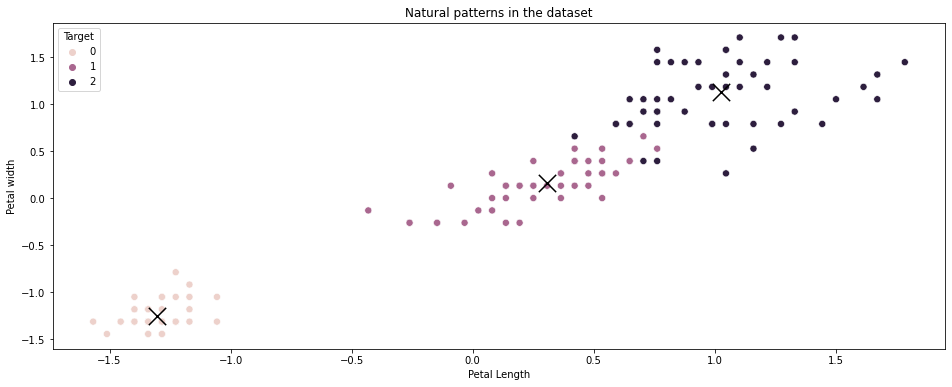

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',hue='Target',s=50,data=standardized_cluster_df,ax=ax)
ax.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal width')
ax.set_title('Natural patterns in the dataset')
plt.show()

In [11]:
colormap = np.array(['r', 'g', 'b'])

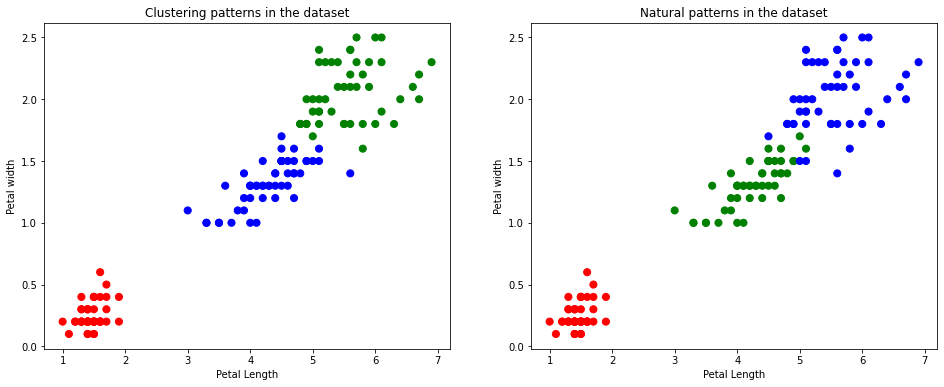

In [12]:
fig, ax = plt.subplots(figsize=(16,6),nrows=1, ncols=2)
ax[0].scatter(x='petal length (cm)', y='petal width (cm)',s=50,c=colormap[labels],data=cluster_df)
ax[0].set_xlabel('Petal Length')
ax[0].set_ylabel('Petal width')
ax[0].set_title('Clustering patterns in the dataset')

ax[1].scatter(x='petal length (cm)', y='petal width (cm)',s=50,c=colormap[iris.target],data=cluster_df)
ax[1].set_xlabel('Petal Length')
ax[1].set_ylabel('Petal width')
ax[1].set_title('Natural patterns in the dataset')
plt.show()